CNN in Image dataset

In [ ]:
import tensorflow as tf
import os



In [ ]:

import cv2
import imghdr


In [ ]:
data_dir = '/content/drive/MyDrive/NNDL/Data' 
image_exts = ['jpeg','jpg', 'bmp', 'png']


In [ ]:

for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)


Image not in ext list /content/drive/MyDrive/NNDL/Data/buffalo/046.jpg
Image not in ext list /content/drive/MyDrive/NNDL/Data/buffalo/036.jpg
Image not in ext list /content/drive/MyDrive/NNDL/Data/buffalo/041.jpg
Image not in ext list /content/drive/MyDrive/NNDL/Data/buffalo/088.jpg
Image not in ext list /content/drive/MyDrive/NNDL/Data/buffalo/034.jpg
Image not in ext list /content/drive/MyDrive/NNDL/Data/buffalo/205.jpg
Image not in ext list /content/drive/MyDrive/NNDL/Data/buffalo/294.jpg
Image not in ext list /content/drive/MyDrive/NNDL/Data/buffalo/303.jpg
Image not in ext list /content/drive/MyDrive/NNDL/Data/buffalo/263.jpg
Image not in ext list /content/drive/MyDrive/NNDL/Data/buffalo/108.jpg
Image not in ext list /content/drive/MyDrive/NNDL/Data/buffalo/240.jpg
Image not in ext list /content/drive/MyDrive/NNDL/Data/rhino/053.jpg
Image not in ext list /content/drive/MyDrive/NNDL/Data/rhino/162.jpg
Image not in ext list /content/drive/MyDrive/NNDL/Data/rhino/208.jpg
Image not in

In [ ]:

import numpy as np
from matplotlib import pyplot as plt



In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 1341 files belonging to 4 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()


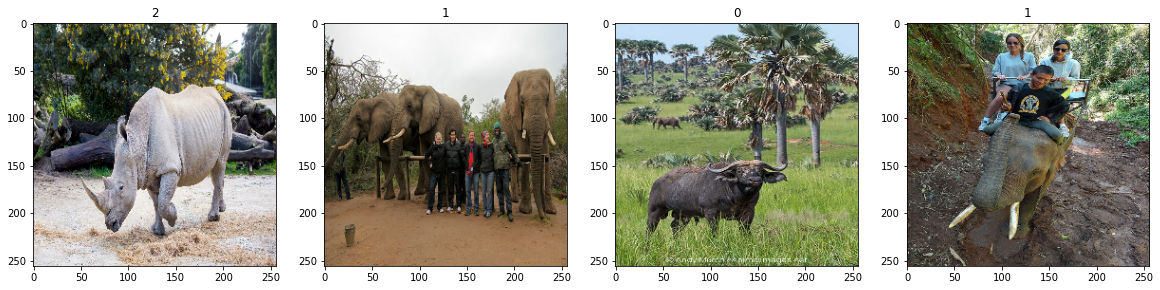

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)


In [ ]:
train_size


29

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)



In [ ]:
train


<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [ ]:
logdir='logs'


     

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


     

hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
29/29 [==============================] - 96s 3s/step - loss: -3421.5005 - accuracy: 0.1735 - val_loss: -19750.9004 - val_accuracy: 0.1758
Epoch 2/20
29/29 [==============================] - 78s 3s/step - loss: -250724.1094 - accuracy: 0.1778 - val_loss: -994285.9375 - val_accuracy: 0.1914
Epoch 3/20
29/29 [==============================] - 77s 3s/step - loss: -6039532.5000 - accuracy: 0.1789 - val_loss: -16505327.0000 - val_accuracy: 0.1836
Epoch 4/20
29/29 [==============================] - 84s 3s/step - loss: -52567644.0000 - accuracy: 0.1670 - val_loss: -132696112.0000 - val_accuracy: 0.1445
Epoch 5/20
29/29 [==============================] - 76s 3s/step - loss: -264705584.0000 - accuracy: 0.1681 - val_loss: -526803072.0000 - val_accuracy: 0.1680
Epoch 6/20
29/29 [==============================] - 77s 3s/step - loss: -1023982720.0000 - accuracy: 0.1789 - val_loss: -1880767488.0000 - val_accuracy: 0.1680
Epoch 7/20
29/29 [==============================] - 76s 3s/step - los

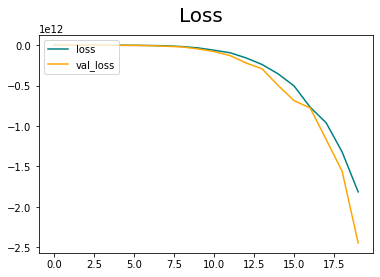

In [ ]:
# Plot Performance

fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

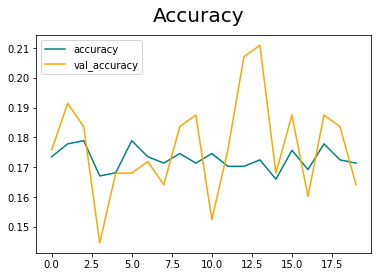

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


In [ ]:
# Evaluate

from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(pre.result(), re.result(), acc.result())


1/1 [==============================] - 0s 485ms/step
tf.Tensor(0.75, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.125, shape=(), dtype=float32)
